In [29]:
# This project is designed to retrieve real-time data on Crypto currency prices using an API

# The project is split in 4 main parts
    # 1. Connecting to the API
    # 2. Automating the API Data Pull
    # 3. Transforming Data
    # 4. Visualizing Data

    
    
# 1.Connecting to the API

# Load in supplied API Code and change API Key

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e8222e03-df72-427b-9a6c-7aaf47a34f85',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-12T12:05:05.060Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9995}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11596, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [30]:
import pandas as pd

#This allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#This normalizes the data and makes it all pretty in a dataframe including a timestamp
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11596,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720071.00000,19720071.00000,False,nan,1,nan,nan,None,2024-07-12T12:04:00.000Z,57300.98169,27657649548.23117,10.12370,0.27645,-2.23787,3.55773,-15.43012,-8.70101,-14.99713,1129979427376.21558,53.58040,1203320615574.88989,None,2024-07-12T12:04:00.000Z,nan,NaN,NaN,NaN,NaN,2024-07-12 12:05:11.340458
1,1027,Ethereum,ETH,ethereum,9129,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120211237.94806,120211237.94806,True,nan,2,nan,nan,None,2024-07-12T12:03:00.000Z,3072.20510,15008125679.51702,7.31150,0.11381,-2.31038,4.42525,-13.03468,3.58334,-6.12328,369313578743.78772,17.51180,369313578743.78998,None,2024-07-12T12:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-07-12 12:05:11.340458
2,825,Tether USDt,USDT,tether,91477,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",nan,112368902073.18105,116072162586.64011,True,nan,3,nan,nan,None,2024-07-12T12:03:00.000Z,1.00010,52554856295.68694,14.63520,-0.01199,0.00785,0.03544,0.03234,0.04255,-0.01030,112379760209.54237,5.32870,116083378566.74001,None,2024-07-12T12:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-12 12:05:11.340458
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,147582404.24830,147582404.24830,False,nan,4,nan,nan,None,2024-07-12T12:03:00.000Z,524.15002,1721350664.95150,11.75930,0.64123,-2.26801,8.15924,-14.03625,-11.89636,-11.77679,77355319451.32661,3.66800,77355319451.33000,None,2024-07-12T12:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-07-12 12:05:11.340458
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,463955827.72799,579989906.78118,True,nan,5,nan,nan,None,2024-07-12T12:03:00.000Z,135.65224,2516507965.12405,47.68280,0.09654,-5.50391,4.38844,-10.60754,-6.88240,-10.39256,62936649481.69833,2.98300,78676932769.14999,None,2024-07-12T12:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-07-12 12:05:11.340458
5,3408,USDC,USDC,usd-coin,20918,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,33976086580.77550,33976086580.77550,False,nan,6,nan,nan,None,2024-07-12T12:03:00.000Z,0.99997,5888375265.27928,12.65400,-0.00148,-0.00318,-0.00064,0.00267,-0.01003,-0.00341,33975233632.23365,1.61110,33975233632.23000,None,2024-07-12T12:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-12 12:05:11.340458
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,nan,7,nan,nan,None,2024-07-12T12:04:00.000Z,0.47103,1550474646.52317,62.73180,0.00774,4.87197,13.14006,-2.46208,-7.01487,-13.32119,26285753133.87945,1.24640,47102577248.18000,None,2024-07-12T12:04:00.000Z,nan,NaN,NaN,NaN,NaN,2024-07-12 12:05:11.340458
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",nan,2506839173.24287,5108887176.99553,True,nan,8,3414166606.00000,24657281733.33858,None,2024-07-12T12:03:00.000Z,7.22205,270276165.35650,41.45450,-0.37880,0.44400,3.13409,1.81910,-1.81727,9.08201,18104517701.68209,0.85850,36896638332.07000,None,2024-07-1

In [31]:
# 2. Automating the API Data Pull

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e8222e03-df72-427b-9a6c-7aaf47a34f85',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [32]:
# 3. Transforming Data

# Change notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Look at coin trends over time and make data usable
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4 = df3.stack()
df5 = df4.to_frame(name='values')

# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# so I'm going to create a range and pass that as the dataframe.
index = pd.Index(range(90))
# Set the above DataFrame index object as the index using set_index() function
df6 = df5.reset_index()

# Change column names and improve datafram understandability
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.27645
1,Bitcoin,24h,-2.23787
2,Bitcoin,7d,3.55773
3,Bitcoin,30d,-15.43012
4,Bitcoin,60d,-8.70101
5,Bitcoin,90d,-14.99713
6,Ethereum,1h,0.11381
7,Ethereum,24h,-2.31038
8,Ethereum,7d,4.42525
9,Ethereum,30d,-13.03468


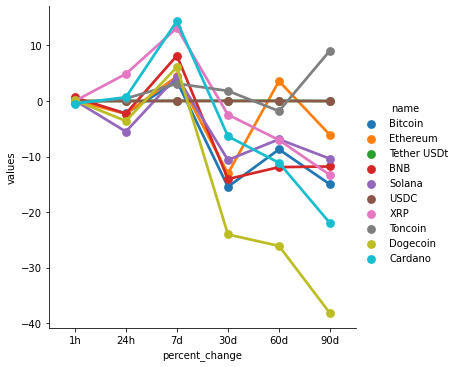

In [33]:
# 4. Visualizing Data

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [35]:
# Look at Bitcoin only - works when data automation is running

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

,name,quote.USD.price,timestamp
0,Bitcoin,57300.98169,2024-07-12 12:05:11.340458
